In [3]:
import numpy as np
import matplotlib.pyplot as plt
import burst_detector as bd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
n_chan = 385
times = np.load('../data/neuropixels_dohoung/KS2.5/phy_in/spike_times.npy').flatten()
clusters = np.load('../data/neuropixels_dohoung/KS2.5/phy_in/spike_clusters.npy').flatten()
mean_wf = np.load("../data/neuropixels_dohoung/KS2.5/phy_in/mean_waveforms.npy")

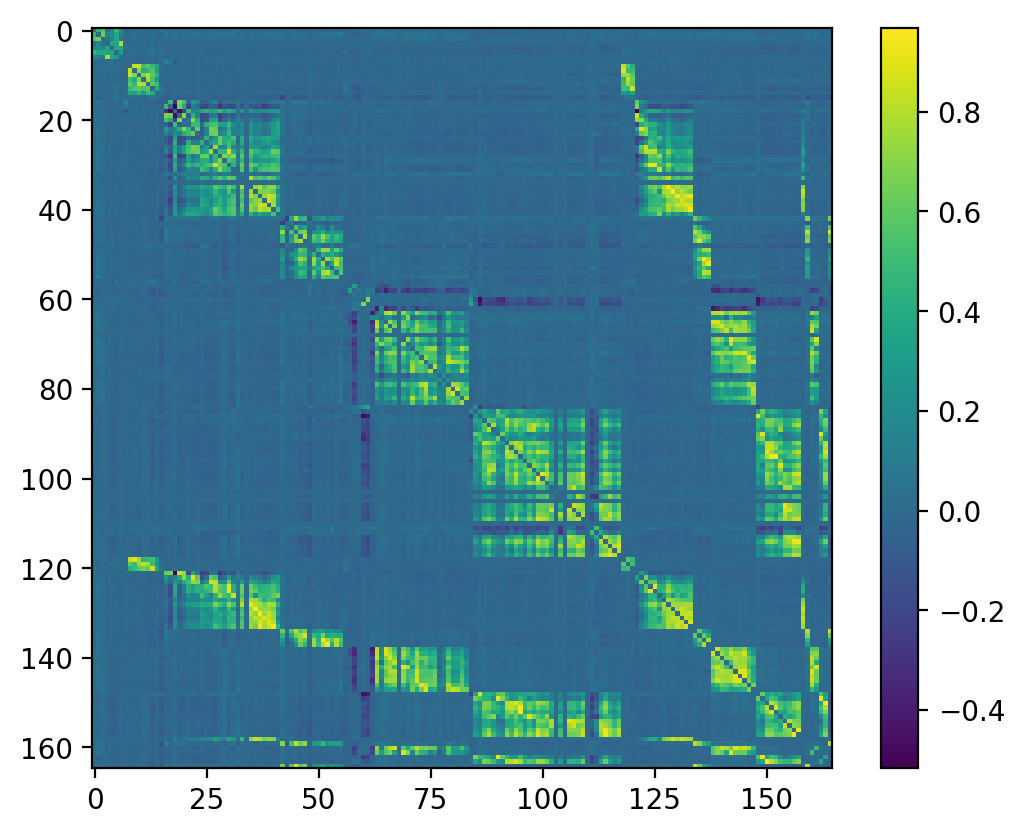

In [5]:
mean_sim, wf_means_norm = bd.wf_means_similarity(mean_wf)
plt.imshow(mean_sim)
plt.colorbar();

In [6]:
mean_sim[3,6]

0.785056627935854

In [7]:
# load raw data
rawData = np.memmap("../data/neuropixels_dohoung/KS2.5/catgt_ANM480363_20210527_pfc320_hpc180_g0/ANM480363_20210527_pfc320_hpc180_g0_imec1/ANM480363_20210527_pfc320_hpc180_g0_tcat.imec1.ap.bin", dtype='int16', mode='r')
data = np.reshape(rawData, (int(rawData.size/n_chan), n_chan))

In [8]:
sp_3 = bd.extract_spikes(data, times, clusters, 3)
sp_6 = bd.extract_spikes(data, times, clusters, 6)

sp_3_norm = bd.normalize_wfs(sp_3)
sp_6_norm = bd.normalize_wfs(sp_6)

In [9]:
proj_3on3_norm = np.zeros((sp_3_norm.shape[0]))
proj_6on3_norm = np.zeros((sp_6_norm.shape[0]))

proj_3on3 = np.zeros((sp_3.shape[0]))
proj_6on3 = np.zeros((sp_6.shape[0]))

for i in range(sp_3.shape[0]):
    proj_3on3[i] = np.dot(sp_3[i].flatten(), wf_means_norm[3].flatten())
for i in range(sp_6.shape[0]):
    proj_6on3[i] = np.dot(sp_6[i].flatten(), wf_means_norm[3].flatten())

for i in range(sp_3.shape[0]):
    proj_3on3_norm[i] = np.dot(sp_3_norm[i].flatten(), wf_means_norm[3].flatten())
for i in range(sp_6.shape[0]):
    proj_6on3_norm[i] = np.dot(sp_6_norm[i].flatten(), wf_means_norm[3].flatten())
    
proj_3on6_norm = np.zeros((sp_3_norm.shape[0]))
proj_6on6_norm = np.zeros((sp_6_norm.shape[0]))
for i in range(sp_3.shape[0]):
    proj_3on6_norm[i] = np.dot(sp_3_norm[i].flatten(), wf_means_norm[6].flatten())
for i in range(sp_6.shape[0]):
    proj_6on6_norm[i] = np.dot(sp_6_norm[i].flatten(), wf_means_norm[6].flatten())
    
proj_3on6 = np.zeros((sp_3_norm.shape[0]))
proj_6on6 = np.zeros((sp_6_norm.shape[0]))
for i in range(sp_3.shape[0]):
    proj_3on6[i] = np.dot(sp_3[i].flatten(), wf_means_norm[6].flatten())
for i in range(sp_6.shape[0]):
    proj_6on6[i] = np.dot(sp_6[i].flatten(), wf_means_norm[6].flatten())

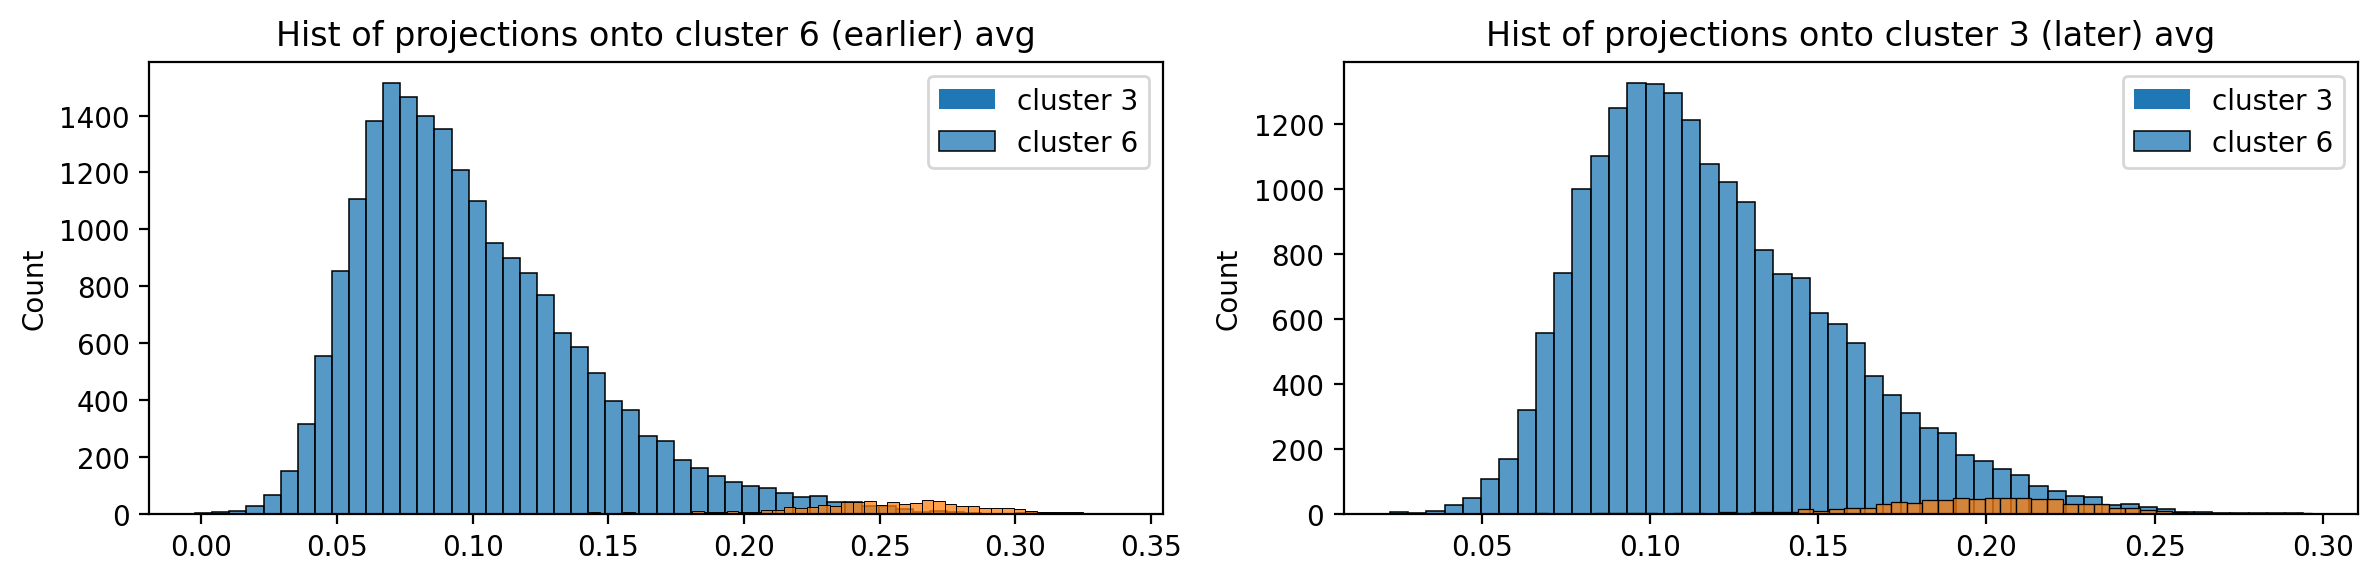

In [15]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title("Hist of projections onto cluster 6 (earlier) avg")
sns.histplot(proj_3on6_norm, bins=50);
sns.histplot(proj_6on6_norm, bins=50)
plt.legend(["cluster 3","cluster 6"])

plt.subplot(1,2,2)
plt.title("Hist of projections onto cluster 3 (later) avg")
sns.histplot(proj_3on3_norm, bins=50);
sns.histplot(proj_6on3_norm, bins=50)
plt.legend(["cluster 3","cluster 6"]);

plt.tight_layout()
